In [75]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection

def plot_cube(cube_definitions):
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')
    
    for cube_definition in cube_definitions:
        cube_definition_array = [
            np.array(list(item))
            for item in cube_definition
        ]

        points = []
        points += cube_definition_array
        vectors = [
            cube_definition_array[1] - cube_definition_array[0],
            cube_definition_array[2] - cube_definition_array[0],
            cube_definition_array[3] - cube_definition_array[0]
        ]

        points += [cube_definition_array[0] + vectors[0] + vectors[1]]
        points += [cube_definition_array[0] + vectors[0] + vectors[2]]
        points += [cube_definition_array[0] + vectors[1] + vectors[2]]
        points += [cube_definition_array[0] + vectors[0] + vectors[1] + vectors[2]]

        points = np.array(points)

        edges = [
            [points[0], points[3], points[5], points[1]],
            [points[1], points[5], points[7], points[4]],
            [points[4], points[2], points[6], points[7]],
            [points[2], points[6], points[3], points[0]],
            [points[0], points[2], points[4], points[1]],
            [points[3], points[6], points[7], points[5]]
        ]

        faces = Poly3DCollection(edges, linewidths=1, edgecolors='k')
        faces.set_facecolor((0,0,1,0.1))

        ax.add_collection3d(faces)

        # Plot the points themselves to force the scaling of the axes
        ax.scatter(points[:,0], points[:,1], points[:,2], s=0)
        
        #ax.set_axis_off()
        ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        
        ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0)) 
        ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0)) 
        ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
        
        ax.set_xticks([])                               
        ax.set_yticks([])                               
        ax.set_zticks([])
        
        ax.set_xlabel('lon')
        ax.set_ylabel('time')
        ax.set_zlabel('lat')

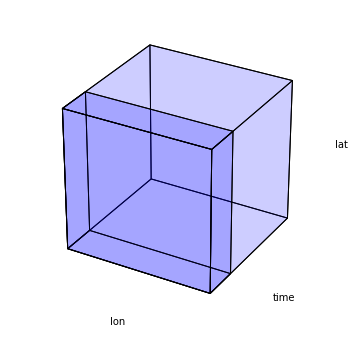

In [76]:
cube_definitions = [[(0,0,0), (0,1,0), (1,0,0), (0,0,1)]]
nb = 4
for dt in range(1):
    cube_definitions.append(
        [(0,dt/nb,0), (0,(dt+1)/nb,0), (1,dt/nb,0), (0,dt/nb,1)]
    )
plot_cube(cube_definitions)

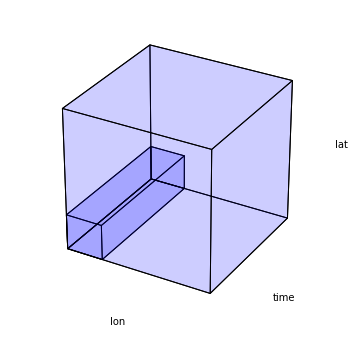

In [77]:
nb = 4
cube_definitions = [[(0,0,0), (0,1,0), (1,0,0), (0,0,1)]]
for dt0 in range(1):
    for dt1 in range(1):
        cube_definitions.append([(dt1/nb,0,dt0/nb), (dt1/nb,1,dt0/nb), ((dt1+1)/nb,0,dt0/nb), (dt1/nb,0,(dt0+1)/nb)])
plot_cube(cube_definitions)